In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
key = os.getenv("DOCUMENT_INTELLIGENCE_KEY")
endpoint = os.getenv("DOCUMENT_INTELLIGENCE_ENDPOINT")

In [2]:
# import libraries
import os
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential

In [9]:
# sample image document
imagePath = "1.jpg"  # Can be .jpg, .jpeg, or .png

with open(imagePath, "rb") as f:
    document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )

    poller = document_analysis_client.begin_analyze_document(
        "prebuilt-receipt", document=f  # Use "prebuilt-document" for general document analysis
    )
    result = poller.result()

In [16]:
result.pages

[DocumentPage(page_number=1, angle=-2.2755000591278076, width=688.0, height=1024.0, unit=pixel, lines=[DocumentLine(content=TRADER JOE'S, polygon=[Point(x=190.0, y=141.0), Point(x=495.0, y=132.0), Point(x=496.0, y=162.0), Point(x=191.0, y=171.0)], spans=[DocumentSpan(offset=0, length=12)]), DocumentLine(content=2001 Greenville Ave, polygon=[Point(x=216.0, y=206.0), Point(x=396.0, y=200.0), Point(x=397.0, y=219.0), Point(x=217.0, y=226.0)], spans=[DocumentSpan(offset=13, length=19)]), DocumentLine(content=Dallas TX 75206, polygon=[Point(x=226.0, y=227.0), Point(x=386.0, y=220.0), Point(x=387.0, y=238.0), Point(x=226.0, y=245.0)], spans=[DocumentSpan(offset=33, length=15)]), DocumentLine(content=Store #403 - (469) 334-0614, polygon=[Point(x=181.0, y=247.0), Point(x=435.0, y=236.0), Point(x=435.0, y=257.0), Point(x=182.0, y=268.0)], spans=[DocumentSpan(offset=49, length=27)]), DocumentLine(content=OPEN 8:00AM TO 9:00PM DAILY, polygon=[Point(x=185.0, y=289.0), Point(x=435.0, y=279.0), Poin

In [19]:
result.documents

[AnalyzedDocument(doc_type=receipt.retailMeal, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=0.0, y=0.0), Point(x=688.0, y=0.0), Point(x=688.0, y=1024.0), Point(x=0.0, y=1024.0)])], spans=[DocumentSpan(offset=0, length=822)], fields={'Items': DocumentField(value_type=list, value=[DocumentField(value_type=dictionary, value={'Description': DocumentField(value_type=string, value='R-CARROTS SHREDDED 10 OZ', content=R-CARROTS SHREDDED 10 OZ, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=122.0, y=335.0), Point(x=345.0, y=328.0), Point(x=346.0, y=350.0), Point(x=123.0, y=357.0)])], spans=[DocumentSpan(offset=105, length=24)], confidence=0.985), 'TotalPrice': DocumentField(value_type=float, value=1.29, content=1.29, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=429.0, y=324.0), Point(x=464.0, y=323.0), Point(x=465.0, y=341.0), Point(x=430.0, y=342.0)])], spans=[DocumentSpan(offset=130, length=4)], confidence=0.987)}, content=R-CARROTS SH

In [23]:
len(result.documents)

1

In [24]:
result.documents[0]

AnalyzedDocument(doc_type=receipt.retailMeal, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=0.0, y=0.0), Point(x=688.0, y=0.0), Point(x=688.0, y=1024.0), Point(x=0.0, y=1024.0)])], spans=[DocumentSpan(offset=0, length=822)], fields={'Items': DocumentField(value_type=list, value=[DocumentField(value_type=dictionary, value={'Description': DocumentField(value_type=string, value='R-CARROTS SHREDDED 10 OZ', content=R-CARROTS SHREDDED 10 OZ, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=122.0, y=335.0), Point(x=345.0, y=328.0), Point(x=346.0, y=350.0), Point(x=123.0, y=357.0)])], spans=[DocumentSpan(offset=105, length=24)], confidence=0.985), 'TotalPrice': DocumentField(value_type=float, value=1.29, content=1.29, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=429.0, y=324.0), Point(x=464.0, y=323.0), Point(x=465.0, y=341.0), Point(x=430.0, y=342.0)])], spans=[DocumentSpan(offset=130, length=4)], confidence=0.987)}, content=R-CARROTS SHR

In [26]:
document = result.documents[0]

In [27]:
document.fields

{'Items': DocumentField(value_type=list, value=[DocumentField(value_type=dictionary, value={'Description': DocumentField(value_type=string, value='R-CARROTS SHREDDED 10 OZ', content=R-CARROTS SHREDDED 10 OZ, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=122.0, y=335.0), Point(x=345.0, y=328.0), Point(x=346.0, y=350.0), Point(x=123.0, y=357.0)])], spans=[DocumentSpan(offset=105, length=24)], confidence=0.985), 'TotalPrice': DocumentField(value_type=float, value=1.29, content=1.29, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=429.0, y=324.0), Point(x=464.0, y=323.0), Point(x=465.0, y=341.0), Point(x=430.0, y=342.0)])], spans=[DocumentSpan(offset=130, length=4)], confidence=0.987)}, content=R-CARROTS SHREDDED 10 OZ
 1.29, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=122.0, y=333.0), Point(x=464.0, y=323.0), Point(x=465.0, y=347.0), Point(x=123.0, y=357.0)])], spans=[DocumentSpan(offset=105, length=29)], confidence=0.983), Document

In [30]:
type(document.fields)

dict

In [31]:
document.fields.keys()

dict_keys(['Items', 'MerchantAddress', 'MerchantName', 'MerchantPhoneNumber', 'Subtotal', 'Total', 'TransactionDate', 'TransactionTime'])

In [29]:
document.fields["MerchantName"]

DocumentField(value_type=string, value="TRADER JOE'S", content=TRADER JOE'S, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=194.0, y=141.0), Point(x=489.0, y=133.0), Point(x=490.0, y=164.0), Point(x=195.0, y=172.0)])], spans=[DocumentSpan(offset=0, length=12)], confidence=0.979)

In [22]:
# Check if any documents were extracted
if len(result.documents) > 0:
    document = result.documents[0]  # Get the first document

    print("Receipt Fields:")
    
    # Merchant Name
    if document.fields.get("MerchantName"):
        print(f"Merchant Name: {document.fields['MerchantName'].value}")
    
    # Transaction Date
    if document.fields.get("TransactionDate"):
        print(f"Transaction Date: {document.fields['TransactionDate'].value}")
    
    # Total
    if document.fields.get("Total"):
        print(f"Total: {document.fields['Total'].value}")
    
    # Items
    if document.fields.get("Items"):
        print("Items:")
        for idx, item in enumerate(document.fields["Items"].value):
            print(f"  Item {idx + 1}:")
            if item.value.get("Description"):
                print(f"    Description: {item.value['Description'].value}")
            if item.value.get("TotalPrice"):
                print(f"    Total Price: {item.value['TotalPrice'].value}")

else:
    print("No receipts were extracted from the image.")

Receipt Fields:
Merchant Name: TRADER JOE'S
Transaction Date: 2014-06-28
Total: 38.68
Items:
  Item 1:
    Description: R-CARROTS SHREDDED 10 OZ
    Total Price: 1.29
  Item 2:
    Description: R-CUCUMBERS PERSIAN 1 LB
    Total Price: 1.99
  Item 3:
    Description: TOMATOES CRUSHED NO SALT
    Total Price: 1.59
  Item 4:
    Description: TOMATOES WHOLE NO SALT W/BASIL
    Total Price: 1.59
  Item 5:
    Description: ORGANIC OLD FASHIONED OATMEAL
    Total Price: 2.69
  Item 6:
    Description: MINI-PEARL TOMATOES ..
    Total Price: 2.49
  Item 7:
    Description: PKG SHREDDED MOZZARELLA LITE T
    Total Price: 3.99
  Item 8:
    Description: EGGS 1 DOZ ORGANIC BROWN.
    Total Price: 3.79
  Item 9:
    Description: BEANS GARBANZO
    Total Price: 0.89
  Item 10:
    Description: SPROUTED CA STYLE
    Total Price: 2.99
  Item 11:
    Description: A-AVOCADOS HASS BAG 4CT
    Total Price: 3.99
  Item 12:
    Description: A-APPLE BAG JAZZ 2 LB
    Total Price: 2.99
  Item 13:
    Descri

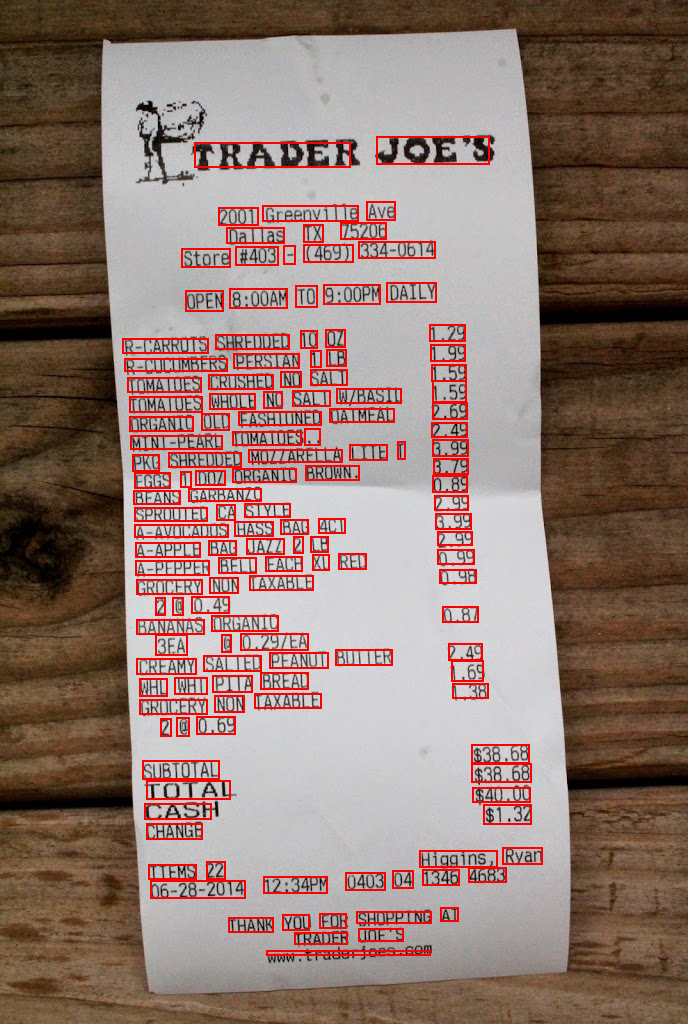

In [18]:
from PIL import Image, ImageDraw
from IPython.display import display

# Open the original image
image = Image.open(imagePath)
draw = ImageDraw.Draw(image)

# Draw bounding boxes for each word
for page in result.pages:
    for word in page.words:
        # Get bounding box coordinates
        x0, y0 = word.polygon[0].x, word.polygon[0].y
        x1, y1 = word.polygon[2].x, word.polygon[2].y
        
        # Draw rectangle
        draw.rectangle([x0, y0, x1, y1], outline="red", width=2)

# Save the image with bounding boxes
display(image)